# Project 2 - Kernel Regression

Kernel regression is an estimation technique to fit your data. Given a data set $X=(x_i,y_i)$ , you want to find a regression function $f(X)$ such that that function is best-fit match to your data at those data points. 

Different from linear regression or polynomial regression, kernel regression does not assume any underlying distribution to estimate the regression function. That is why kernel regression is categorized as non-parametric technique.

The idea of kernel regression is putting a set of identical weighted function called Kernel local to each observational data point. The kernel will assign weight to each location based on distance from the data point. The kernel basis function depend only to the radius or width (or variance) from the 'local' data point X to a set of neighboring locations x. Kernel regression is a superset of local weighted regression and closely related to **Moving  Average** and **K nearest neighbor** , **radial basis function (RBF)**, **Neural Network** and **Support Vector Machine (SVM)** to be addressed later on in the cource.


## Kernel Functions

In Kernel regression, what you do is to put a kernel (a kind of bump function) to each point of your X data. We say that the kernel
provides a basis function to the regression line. Figure below shows how a kernel of one data
point is applied to give weights to the other data points inside the window. Data points outside
the window will not be affected by the kernel.

![kernel1](Kernel_clip_image002_1.gif)

The kernel basis function can be any type of function satisfying the following criteria
1. Kernel value is non-negative (can be zero)
2. The maximum value is at the original data point.
3. Farther away from the maximum value the kernel value is monotonically decreasing
4. In general it is radial symmetric function

# Kernel regression - Formal Definition


**Kernel regression** is a non-parametric method for regression. The regression models solve the following  problem: 

Given  a dataset:
$$(x_i,y_i), i=1, \dots, N$$
Use a model 
$$ y_i=r(x_i)+\epsilon_i, \forall,i=1,\dots,n$$ 

where $r$ is a function.

\begin{itemize}
\item If $r$ is a linear function of $x_i$, then the model is a linear regression model without or with regularization term in the loss function.
\item If r is nonlinear function. It becomes a nonlinear regression model.
\item If r has no functional form, instead, a weight is given to a each data point, we have a nonparameteric regression model, or kernel regression model. 
\end{itemize}

In the nonparameteric regression model, or kernel regression model the r function is defined as 

$$r(x)=\sum_{i=1}^{n} w\left(x, x_{i}\right) \cdot y_{i}$$

To obtain the weights  $w(x,x_i)$ we use a function K, called kernel,  to map discrete samples (data) to continuous space. There are lots of choices for the kernel. Some common choices are box, Gaussian and Epanechnikov kernel defined as follows:

the box kernel is:
$$
K(x)=\left\{\begin{array}{ll}{1 / 2} & {\text { if }|x| \leq 1} \\ {0} & {\text { otherwise }}\end{array}\right.
$$

the Gaussian kernel is:

$$
K(x)=\frac{1}{\sqrt{2 \pi}} \exp \left(-x^{2} / 2\right)
$$
and the Epanechnikov kernel is:

$$
K(x)=\left\{\begin{array}{ll}{3 / 4\left(1-x^{2}\right)} & {\text { if }|x| \leq 1} \\ {0} & {\text { else }}\end{array}\right.
$$

Given a choice of kernel K, and a bandwidth h, we define the weights as follows:

$$
w\left(x, x_{i}\right)=\frac{K\left(\frac{x_{i}-x}{h}\right)}{\sum_{j=1}^{n} K\left(\frac{x_{j}-x}{h}\right)}
$$

and the fitted value for any $x_k$ is: 
$$
y_{k}=\sum_{i} w\left(x_{k}, x_{i}\right) y_{i}
$$

that leads to a kernel regression method.

## Example of kernel regression 

The Nadaraya–Watson estimate is  a weighted average of $Y_1,\dots,Y_n$ by means of the set of weights $\left\{W_{i}(x)\right\}_{i=1}^{n}$ (they add to one). The set of varying weights depends on the evaluation point x. That means that the Nadaraya–Watson estimator is a local mean of $Y_{1}, \ldots, Y_{n}$ around $X=x$.

Reference: https://bookdown.org/egarpor/PM-UC3M/npreg-kre.html

In [8]:
# A naive implementation of the Nadaraya-Watson estimator
nw <- function(x, X, Y, h, K = dnorm) {

  # Arguments
  # x: evaluation points
  # X: vector (size n) with the predictors
  # Y: vector (size n) with the response variable
  # h: bandwidth
  # K: kernel

  # Matrix of size n x length(x) (rbind() is called for ensuring a matrix
  # output if x is a scalar)
  Kx <- rbind(sapply(X, function(Xi) K((x - Xi) / h) / h))

  # Weights
  W <- Kx / rowSums(Kx) # Column recycling!

  # Means at x ("drop" to drop the matrix attributes)
  drop(W %*% Y)

}

# Generate some data to test the implementation
set.seed(12345)
n <- 100
eps <- rnorm(n, sd = 2)
m <- function(x) x^2 * cos(x)
# m <- function(x) x - x^2 # Other possible regression function, works
# equally well
X <- rnorm(n, sd = 2)
Y <- m(X) + eps
x_grid <- seq(-10, 10, l = 500)

# Bandwidth
h <- 0.5

# Plot data
plot(X, Y)
rug(X, side = 1); rug(Y, side = 2)
lines(x_grid, m(x_grid), col = 1)
lines(x_grid, nw(x = x_grid, X = X, Y = Y, h = h), col = 2)
legend("top", legend = c("True regression", "Nadaraya-Watson"),
       lwd = 2, col = 1:2)

SyntaxError: invalid syntax (<ipython-input-8-b786631d5925>, line 2)

## Python fit function with kernels : box, gaussian, Epanechnikov

In [10]:
import numpy as np
from math import exp,sqrt,pi

def fit(test_X, train_X, train_y, bandwidth=1.0, kn='box'):
    kernels = {
        'box': lambda x: 1/2 if (x<=1 and x>=-1) else 0,
        'gs': lambda x: 1/sqrt(2*pi)*exp(-x**2/2),
        'ep': lambda x: 3/4*(1-x**2) if (x<=1 and x>=-1) else 0
    }
    predict_y = []
    for entry in test_X:
        nks = [np.sum((j-entry)**2)/bandwidth for j in train_X]
        ks = [kernels['box'](i) for i in nks]
        dividend = sum([ks[i]*train_y[i] for i in range(len(ks))])
        divisor = sum(ks)
        predict = dividend/divisor
        predict_y.extend(predict)
        # print(entry)
    return np.array(predict_y)[:,np.newaxis]


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
%matplotlib inline
plt.style.use('ggplot')

### Kernel Regression Appliance with the above kernels


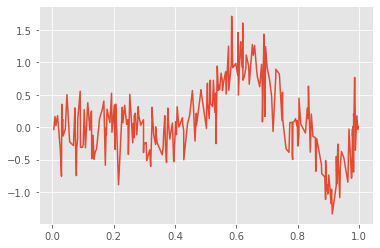

In [6]:
data = pd.read_csv('df.csv')
data.head()
x_data= data.x
y_data= data.y
m_data = data.m
#x_data.head(), y_data.head(),m_data.head()
plt.plot(x_data,y_data)

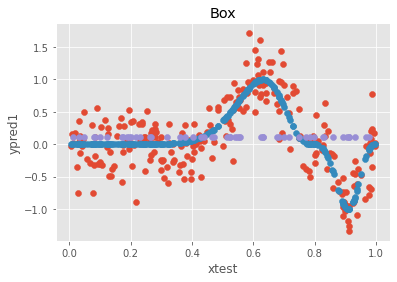

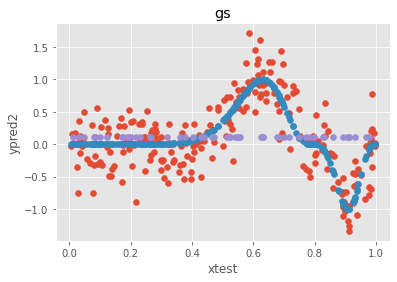

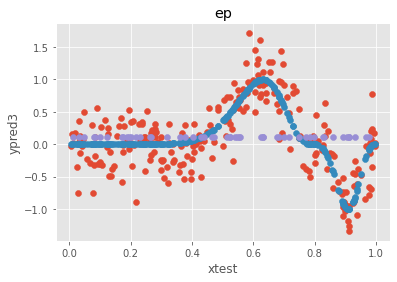

RMSE1: 
0.5755162634530442
RMSE2: 
0.5755162634530442
RMSE3: 
0.5755162634530442


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from math import sqrt

data = pd.read_csv('df.csv')
data.head()
x_data= data['x']
y_data= data['y']
m_data = data['m']

train, test = train_test_split(np.arange(256), test_size=0.2)
xtrain=data.x[train].values
xtrain_2d = xtrain[:,np.newaxis]  #converting 1D to 2D

ytrain = data.y[train].values
ytrain_2d = ytrain[:,np.newaxis]

xtest= data.x[test].values
xtest_2d = xtest[:,np.newaxis]

ytest = data.y[test].values
ytest_2d = ytest[:,np.newaxis]

Ypred1 = fit(xtest_2d,xtrain_2d,ytrain_2d,1, 'box')
Ypred2 = fit(xtest_2d,xtrain_2d,ytrain_2d,1,'gs')
Ypred3 = fit(xtest_2d,xtrain_2d,ytrain_2d,1,'ep')

plt.scatter(x_data,y_data)
plt.scatter(x_data,m_data)
plt.scatter(xtest_2d, Ypred1)
plt.xlabel('xtest')
plt.ylabel('ypred1')
plt.title('Box')
plt.show()

plt.scatter(x_data,y_data)
plt.scatter(x_data,m_data)
plt.scatter(xtest_2d, Ypred2)
plt.xlabel('xtest')
plt.ylabel('ypred2')
plt.title('gs')
plt.show()

plt.scatter(x_data,y_data)
plt.scatter(x_data,m_data)
plt.scatter(xtest_2d, Ypred3)
plt.xlabel('xtest')
plt.ylabel('ypred3')
plt.title('ep')
plt.show()

print('RMSE1: ')
rmse1 = sqrt(mean_squared_error(ytest_2d, Ypred1))

print(rmse1)

print('RMSE2: ')
rmse2 = sqrt(mean_squared_error(ytest_2d, Ypred2))

print(rmse2)

print('RMSE3: ')
rmse3 = sqrt(mean_squared_error(ytest_2d, Ypred3))

print(rmse3)


Fitting Kernel Regression to the dataset 2dExample.csv. Notice that the 2rd column contains the true values of the function

Matlab code for loading the data

      



In [1]:
  data = load("2dExample.csv");
  x = data(:, 1);
  y_orig = data(:, 2);
  y = data(:, 3);

RMSE1:  0.2729413275617991
RMSE2:  0.2729413275617991


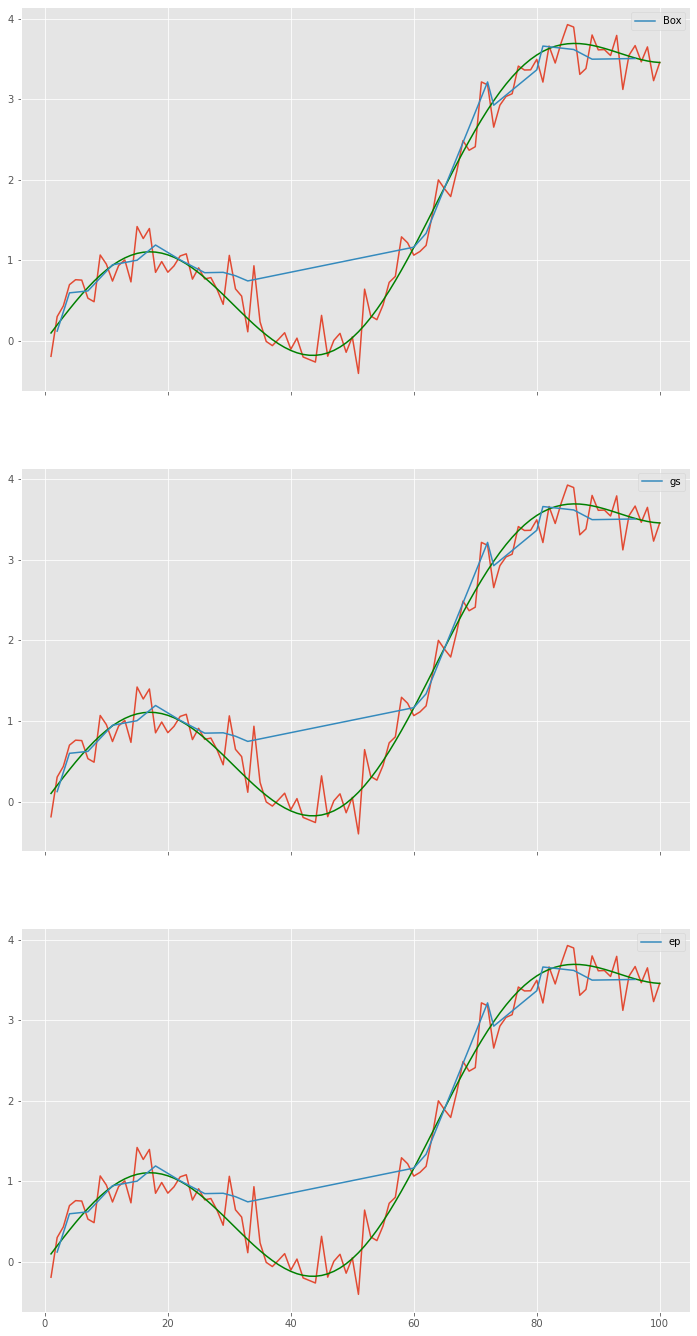

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data = pd.read_csv('2dExample.csv', sep = ',', names = ["x","y_orig","y"]) #label the columns
x_data=data.x
y_orig_data=data.y_orig
y_data=data.y

itrain, itest = train_test_split(np.arange(100), test_size=0.2)
itrain = np.sort(itrain)
itest = np.sort(itest)
xtrain = data.x[itrain].values
xtrain_2d = xtrain[:,np.newaxis]
ytrain = data.y[itrain].values
ytrain_2d = ytrain[:,np.newaxis]
xtest= data.x[itest].values
xtest_2d = xtest[:,np.newaxis]
ytest = data.y[itest].values
ytest_2d = ytest[:,np.newaxis]
ytest_orig = data.y_orig[itest].values
ytest_orig_2d = ytest_orig[:,np.newaxis]
ytrain_orig = data.y_orig[itrain].values
ytrain_orig_2d = ytrain_orig[:,np.newaxis]

rows=3
cols=1
fig, axs = plt.subplots(rows, cols, sharex='col', figsize=(12, 24)) # Set up plotting objects

axs[0].plot(x_data,y_data)
axs[0].plot(x_data, y_orig_data,color='green')
axs[0].plot(xtest_2d,fit(xtest_2d,xtrain_2d,ytrain_2d,1,'box'),label='Box')
axs[0].legend(loc='best') # legend

axs[1].plot(x_data,y_data)
axs[1].plot(x_data, y_orig_data,color='green')
axs[1].plot(xtest_2d,fit(xtest_2d,xtrain_2d,ytrain_2d,1,'gs'),label='gs')
axs[1].legend(loc='best') # legend

axs[2].plot(x_data,y_data)
axs[2].plot(x_data, y_orig_data,color='green')
axs[2].plot(xtest_2d,fit(xtest_2d,xtrain_2d,ytrain_2d,1,'ep'),label='ep')
axs[2].legend(loc='best') # legend


rmse1 = sqrt(mean_squared_error(ytest_2d,fit(xtest_2d,xtrain_2d,ytrain_2d,1,'box') ))

print('RMSE1: ', rmse1)


rmse2 = sqrt(mean_squared_error(ytest_2d, fit(xtest_2d,xtrain_2d,ytrain_2d,1,'gs')))
print('RMSE2: ', rmse2)



#rmse3 = sqrt(mean_squared_error(ytest_2d, fit(xtest_2d,xtrain_2d,ytrain_2d,1,'ep')))
#print('RMSE3: ',rmse3)




The following code generates a 3d dataset in matlab. We write a python script that performs Gaussian Kernel Regression on this
dataset.



ans =

   10201       1

ans =

     1   101

ans =

   101   101

ans =

   101   101

ans =  2


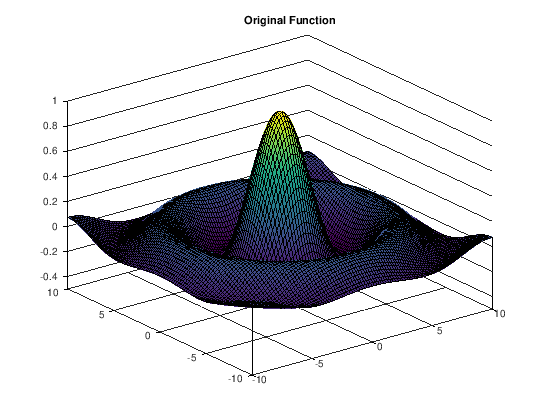

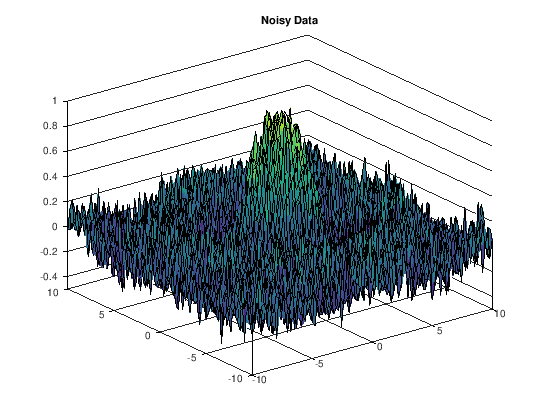

In [6]:
% ======== run3DExample ======== 
% This script  generates a three-dimensional dataset.


% ==================================
%       Generate the Sombrero
% ==================================

% Evaluate the sombrero from -10 to 10 in both dimensions.
% Create a 2D grid of input points, then unwinding this into
% a list of 2D coordinate pairs. There is probably a more elegant
% method for arriving at this result; please leave a comment if you
% know it :).

% Define the range as a row vector.
x = [-10:0.2:10];
#x = np.arrange(-10,10,0,2)

% Create a 2D grid holding the x1 values at every point for the grid.
% Every *row* of this matrix will be identical.

X1 = ones(length(x), length(x));
for (i = 1 : length(x))
    X1(i, :) = x;
end

% Create a 2D grid holding the x2 values at every point for the grid.
% Every *column* of this matrix will be identical.

X2 = ones(length(x), length(x));
for (i = 1 : length(x))
    X2(:, i) = x';
end

% Unwind the two grids into a single list of 2D coordinates.

X = [X1(:) X2(:)];

% Evaluate the sombrero function over every input coordinate.
A = sqrt(X(:, 1).^2 + X(:, 2).^2);
Z_orig = sin(A) ./ A;

% The sombrero function evaluates to NaN at (0, 0), but the correct
% value is 1.
Z_orig(isnan(Z_orig)) = 1;

% Plot the sombrero function using the 'surf' function.
% In order to plot the Z values, we need to reshape the vector
% back into a 2D matrix.
figure(1);
surf(x, x, reshape(Z_orig, length(x), length(x)));
title('Original Function');
axis([-10 10 -10 10 -.5 1.0]);

% ==================================
%       Add Random Noise
% ==================================

% Add random noise to the data.
Z = Z_orig + (0.1 * randn(size(Z_orig)));

% Plot the noisy sombrero using the 'surf' function.
figure(2);
surf(x, x, reshape(Z, length(x), length(x)));
title('Noisy Data');
axis([-10 10 -10 10 -.5 1.0]);
size(Z_orig)
size(x)
size(X1)
size(X2)
    




In [7]:
ndims(Z_orig)   

ans =  2


In [9]:
!pip install matlab

ERROR: Could not find a version that satisfies the requirement matlab.engine
ERROR: No matching distribution found for matlab.engine


In [2]:
# N-dimensional GKR Implementation using numpy
from scipy import io
import numpy
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
loaded = io.loadmat('C:/Users/sofma/Desktop/ECE/PSE/Projects/Project_1_-_Kernel_regression/Project 1 - Kernel regression/Project-1-Kernel-regression/matlab_dataset.mat')


'''Class for Gaussian Kernel Regression'''
class GKR:
    
    def __init__(self, x, y, b):
        self.x = np.array(x)
        self.y = np.array(y)
        self.b = b
    
    '''Implement the Gaussian Kernel'''
    def gaussian_kernel(self, z):
        return (1/np.sqrt(2*np.pi))*np.exp(-0.5*z**2)
    
    '''Calculate weights and return prediction'''
    def predict(self, X):
        kernels = np.array([self.gaussian_kernel((np.linalg.norm(xi-X))/self.b) for xi in self.x])
        weights = np.array([len(self.x) * (kernel/np.sum(kernels)) for kernel in kernels])
        return np.dot(weights.T, self.y)/len(self.x)
    
    def visualize_kernels(self):
        zsum = np.zeros((120,120))
        plt.figure(figsize = (10,5))
        ax = plt.axes(projection = '3d')
        for xi in self.x:
            x, y = np.mgrid[0:120:120j, 0:120:120j]
            xy = np.column_stack([x.flat, y.flat])
            z = multivariate_normal.pdf(xy, mean=xi, cov=self.b)
            z = z.reshape(x.shape)
            zsum += z
            
        ax.plot_surface(x,y,zsum)
            
        ax.set_ylabel('y')
        ax.set_xlabel('x')
        ax.set_zlabel('Kernel Weights wi')

ValueError: the input matrix must be positive semidefinite

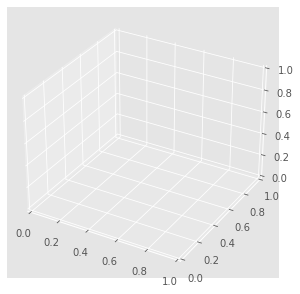

In [31]:
# 3d dummy data
import numpy as np
import matplotlib.pyplot as plt
gkr = GKR(loaded['X1'], loaded['X2'], loaded['Z_orig'].reshape(101,101))
gkr.visualize_kernels()


### k-nearest-neighbors regression  and local polynomial procedures appliance to the above datasets



In [20]:
!pip install mglearn

  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=2ce2f6d7639793679bed393ca8b794bb44809e9ba49a2992f3d31391bab4fc89
  Stored in directory: c:\users\sofma\appdata\local\pip\cache\wheels\87\75\37\404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn


In [42]:
from scipy import io
import numpy
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import sklearn.gaussian_process as gp

loaded = io.loadmat('C:/Users/sofma/Desktop/ECE/PSE/Projects/Project_1_-_Kernel_regression/Project 1 - Kernel regression/Project-1-Kernel-regression/matlab_dataset.mat')
data_X1 = loaded['X1']
data_X2 = loaded['X2']
data_Z_orig = loaded['Z_orig'].reshape(101,101)
print(data_X1.shape)
print(data_X2.shape)
print(data_Z_orig.shape)
s1 = pd.Series(data_X1)
#pd.concat([data_X1, data_X2])
#pd.DataFrame(np.c_[data_X1, data_X2], columns = ['X1','X2'])


(101, 101)
(101, 101)
(101, 101)


ValueError: cannot select an axis to squeeze out which has size not equal to one

In [46]:
res = [print(i) for i in range(19)]


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


In [ ]:
kernel = gp.kernels.ConstantKernel(1.0, (1e-1, 1e3)) * gp.kernels.RBF(10.0, (1e-3, 1e3))
model = gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1, normalize_y=True)
model.fit(X_tr, y_tr)
params = model.kernel_.get_params()

y_pred, std = model.predict(X_te, return_std=True)

MSE = ((y_pred-y_te)**2).mean()


In [25]:
from sklearn.metrics import accuracy_score
import mglearn 
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import numpy as np
from sklearn import model_selection

data1 = pd.read_csv('df.csv')

data2 = pd.read_csv('2dExample.csv', sep = ',', names = ["x","y_orig","y"]) 

data3 = pd.read_csv('data_ch5.csv')

(500, 2)


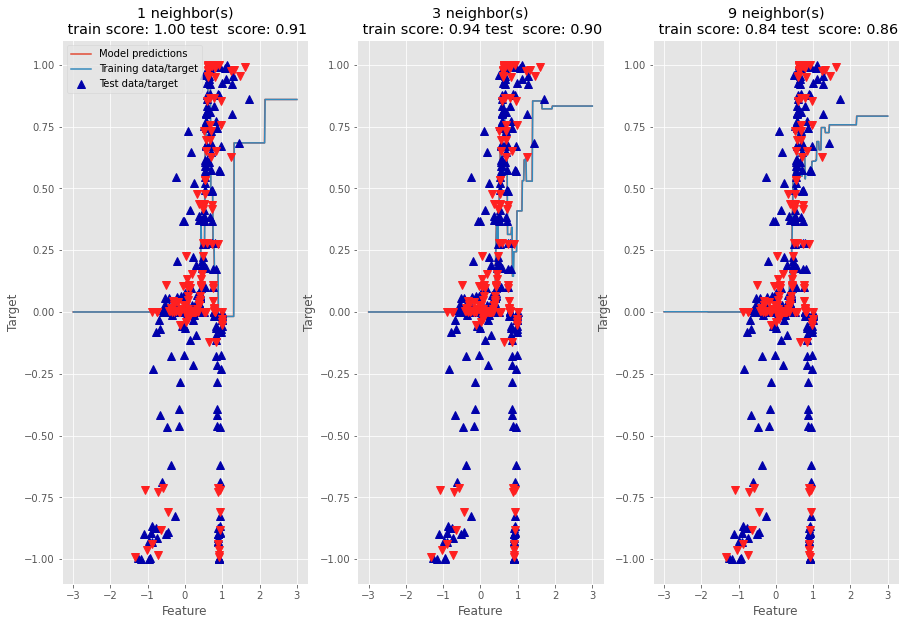

In [58]:
data1.head()
x = data1.x
y = data1.y
m = data1.m

indep = pd.DataFrame(np.c_[x, y], columns = ['x','y'])
dep = pd.DataFrame(np.array(m),columns = ['m'])


# Train/Test split
X_train, X_test, Y_train, Y_test = train_test_split(indep, dep, test_size = 0.33, random_state = 0)


fig, axes = plt.subplots(1, 3, figsize=(15,10))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 2)
print(line.shape)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # Making predictions using 1, 3, or 9 neighbors
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(X_train, Y_train)
    ax.plot(line, model.predict(line))
    ax.plot(X_train, Y_train, '^', c=mglearn.cm2(0),   
             markersize=8)
    ax.plot(X_test, Y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test  score: {:.2f}".format(n_neighbors,    
              model.score(X_train, Y_train),model.score(X_test, 
              Y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target","Test data/target"], loc="best")
plt.show()



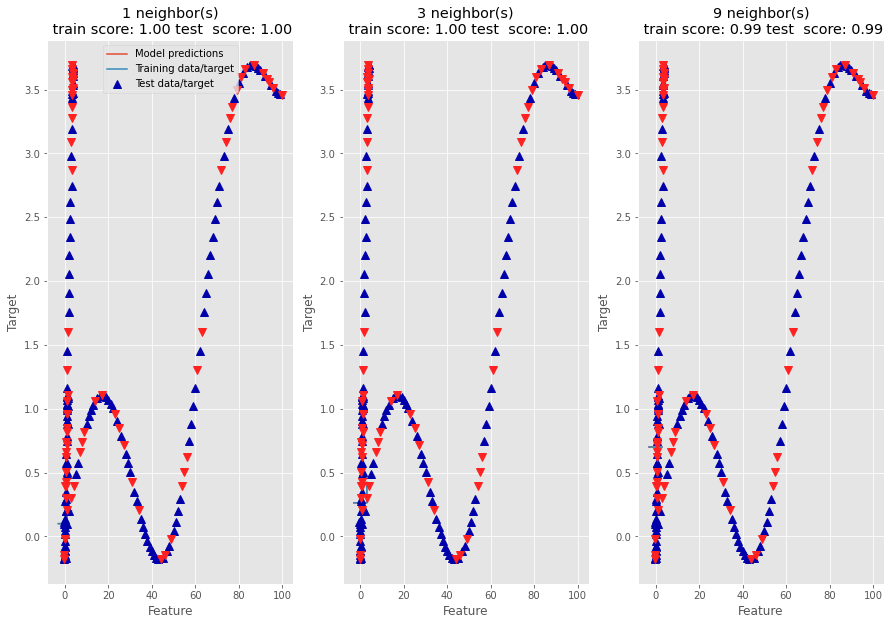

In [65]:
data2.head()

x_data2=data2.x
y_orig_data2=data2.y_orig
y_data2=data2.y


indep = pd.DataFrame(np.c_[x_data2, y_data2], columns = ['x','y'])
dep = pd.DataFrame(np.array(data2.y_orig),columns = ['y_orig'])


# Train/Test split
X_train, X_test, Y_train, Y_test = train_test_split(indep, dep, test_size = 0.33, random_state = 0)


fig, axes = plt.subplots(1, 3, figsize=(15,10))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 2)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # Making predictions using 1, 3, or 9 neighbors
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(X_train, Y_train)
    ax.plot(line, model.predict(line))
    ax.plot(X_train, Y_train, '^', c=mglearn.cm2(0),   
             markersize=8)
    ax.plot(X_test, Y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test  score: {:.2f}".format(n_neighbors,    
              model.score(X_train, Y_train),model.score(X_test, 
              Y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target","Test data/target"], loc="best")
plt.show()





In [26]:
data3.head()

,y,x
0,2.9,1.0
1,11.3,2.0
2,10.6,3.0
3,11.2,4.0
4,10.9,5.0


(1000, 1)


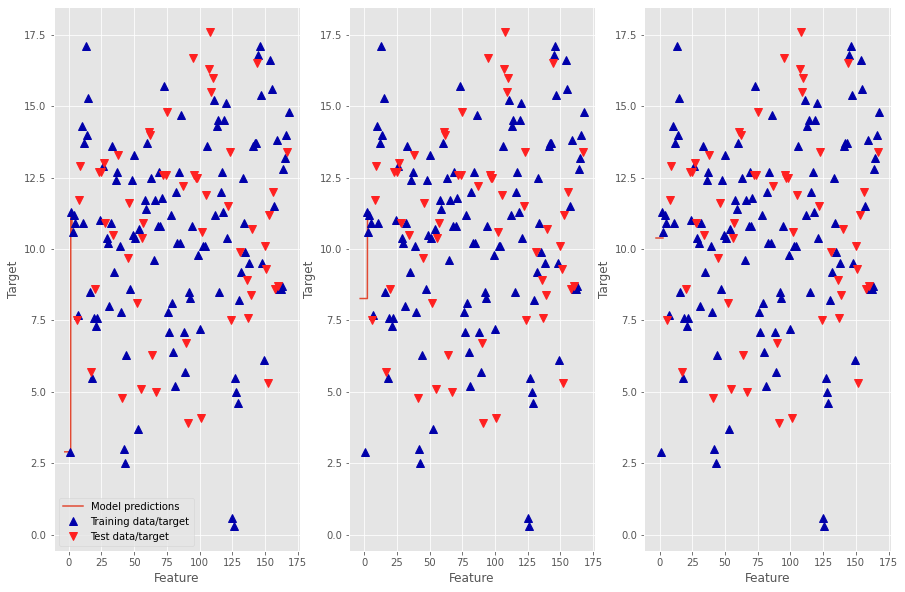

In [75]:
x = data3.x
y = data3.y





# Train/Test split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.33, random_state = 0)


fig, axes = plt.subplots(1, 3, figsize=(15,10))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
print(line.shape)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # Making predictions using 1, 3, or 9 neighbors
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(np.array(X_train).reshape(-1,1), Y_train)
    ax.plot(line, model.predict(line))
    ax.plot(np.array(X_train).reshape(-1,1) , Y_train, '^', c=mglearn.cm2(0),   
             markersize=8)
    ax.plot(X_test, Y_test, 'v', c=mglearn.cm2(1), markersize=8)
   # ax.set_title("{} neighbor(s)\n train score: {:.2f} test  score: {:.2f}".format(n_neighbors,    
              #model.score(np.array(X_train).reshape(-1,1), Y_train),model.score(X_test, 
             # Y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target","Test data/target"], loc="best")
plt.show()
